In [281]:
#library & package. 
#Jalankan ulang jika menambahkan library baru

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json, tweepy, requests, re, string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory as SF
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import nltk

# DATA COLLECTION

In [282]:
class tweetsGrabber:
  def __init__(self):
    with open("token.json")as f:
      tokens = json.load(f)

    self.bearer_token = tokens['bearer_token']
    self.api_key = tokens['api_key']
    self.api_key_secret = tokens['api_key_secret']
    self.access_token = tokens['access_token']
    self.access_token_secret = tokens['access_token_secret']

In [283]:
class api(tweetsGrabber):  
  def auth_handler(self):
    self.api_2 = tweepy.Client(bearer_token=self.bearer_token, wait_on_rate_limit=True)
    return self.api_2

  def search_scraper(self, query, max_result):
    response = tweepy.Paginator(self.auth_handler().search_recent_tweets,
                             query = query,
                             max_results=100,
                             expansions = ["author_id"]
                             ).flatten(limit=max_result)
    
    result = [tweet.text.strip() for tweet in response]
    return result

In [284]:
api_twitter = api()

In [285]:
#Apa kata kunci yang ingin kalian cari di twitter dan kenapa. 
#jelaskan singkat pada sel ini

# Kata kunci yang ingin saya cari adalah anies, karena untuk melihat respon dan pandangan masyarakat tentang Anies Baswedan menarik untuk dilihat.

In [286]:
#ambil data pada twitter dengan kata kunci tersebut.
#ambil sebanyak 300 tweet
#masukkan pada datarame dan tampilkan dataframenya

query = "anies -is:retweet"
max_result = 300

tweets = api_twitter.search_scraper(query, max_result)

In [287]:
result_tweets = [tweet for tweet in tweets]

df_raw = pd.DataFrame(result_tweets, columns=['tweet'])

In [288]:
df_raw

,tweet
0,@AOSBADUYtm007 @aniesbaswedan Sy salah satu da...
1,@fadhlierlanda @kurawa Kalau saya setuju aja k...
2,@adipribadiadang @FerdinandHaean3 Dia itu berh...
3,"Cerita Soal Kampung Akuarium Digusur Ahok, Ani..."
4,"Kampung Akuraium Digusur di Era Ahok, Anies: R..."
...,...
295,@CNNIndonesia Banjir hanya ditujukan buat Anie...
296,Dan hasilnya adalah..... Anies dan keluarga se...
297,@JacobibnUmar @TofaTofa_id @aniesbaswedan @KPK...
298,@daRa__zi Cc buat Anies 😂😂


# DATA PROCESSING

In [289]:
#Lakukan Text Preprocessing (lakukan sebaik mungkin). Masukkan pada dataframe kalian dengan nama kolom tweet_clean.
#jangan lupa lakukan pembersihan slang word/bahasa gaul
#Tampilkan dataframe


In [290]:
def case_folding(data):
    data = data.lower()
    data = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(\d+)"," ",data).split())
    data = data.translate(str.maketrans("","",string.punctuation))
    data = re.sub(r"\n","",data)
    data = re.sub(r"\t","",data)
    
    return data


In [291]:
def stopword_cleaner(data):
    sw_indonesia = stopwords.words("indonesian")
    data  = [word for word in data if word not in sw_indonesia]
    data = ' '.join(data)
    return data

In [292]:
def stemmer_engine(data):
    factory = SF()
    stemmer = factory.create_stemmer()
    data = stemmer.stem(data)
    return data


In [293]:
def slang_cleaner(data):
    slang_list = [
        ('yg','yang'),
        ('ya','iya'),
        ('gak','tidak'),
        ('ga','tidak'),
        ('aja','saja'),
        ('kalo','kalau'),
        ('gajinya','gaji'),
        ('jg','juga'),
        ('jd','jadi'),
        ('klo','kalau'),
        ('dgn','dengan'),
        ('tdk','tidak'),
        ('dki','jakarta'),
        ('id','indonesia'),
        ('lo','anda'),
        ('kadrunhamankri', 'kadrun hama nkri'),
        ('nkrimajuberjaya','nkri maju berjaya'),
        ('sumurresapan','sumur resapan'),
        ('dr','dari'),
        ('tolol','bodoh'),
        ('tp','tapi'),
        ('sdh','sudah'),
        ('lu','anda'),
        ('km','anda'),
        ('jiwarevolusiakhlak','jiwa revolusi akhlak'),
        ('tuh','itu'),
        ('aniesbaswedan','anies baswedan'),
        ('sumurresapananggaran', 'anggaran sumur resapan'),
        ('rk', 'ridwan kamil'),
        ('tau','tahu'),
        ('mana','dimana'),
        ('moga','semoga'),
        ('emang', 'memang'),
        ('nih','ini'),
        ('n','dan'),
        ('gw','saya'),
        ('lobang','lubang'),
        ('krn', 'karena'),
        ('kau','anda'),
        ('msh','masih'),
        ('ri','republik indonesia'),
        ('pa','bapak'),
        ('dah','sudah'),
        ('gub','gubernur'),
        ('bacot','mulut'),
        ('ngga','tidak'),
        ('udah','sudah'),
        ('banjiiiirrrrrr','banjir')
    
        
    ]
    
    word_token = word_tokenize(data)
    word_list = []
    
    for word in word_token:
        for slang in slang_list:
            if word.lower() in slang[0].lower():
                word = slang[1]
                break
        word_list.append(word)
    
    data = ' '.join(word_list)
    return data    

In [294]:
def proses(data):
    data = case_folding(data)
    data = word_tokenize(data)
    data = stopword_cleaner(data)
    data = stemmer_engine(data)
    return data

In [295]:
df_raw['clean_tweet'] = 'NaN'

In [296]:
for index in range(len(df_raw)):
    df_raw.iloc[index,1] = proses(df_raw.iloc[index,0])
    df_raw.iloc[index,1] = slang_cleaner(df_raw.iloc[index,1])
    df_raw.iloc[index,1] = proses(df_raw.iloc[index,1])

In [297]:
df_raw

,tweet,clean_tweet
0,@AOSBADUYtm007 @aniesbaswedan Sy salah satu da...,sy salah dukung anies baswedan nkri maju jaya ...
1,@fadhlierlanda @kurawa Kalau saya setuju aja k...,tuju kaji ulang kaji ulang dst anies baswedan ...
2,@adipribadiadang @FerdinandHaean3 Dia itu berh...,harap ajak anies baswedan utk bantu harap komi...
3,"Cerita Soal Kampung Akuarium Digusur Ahok, Ani...",cerita kampung akuarium gusur ahok anies baswe...
4,"Kampung Akuraium Digusur di Era Ahok, Anies: R...",kampung akuraium gusur era ahok anies baswedan...
...,...,...
295,@CNNIndonesia Banjir hanya ditujukan buat Anie...,banjir anies baswedan anies baswedan kaki bila...
296,Dan hasilnya adalah..... Anies dan keluarga se...,hasil anies baswedan keluarga kaya warga jakar...
297,@JacobibnUmar @TofaTofa_id @aniesbaswedan @KPK...,indonesia kadrun hama nkri kpk bukti anies bas...
298,@daRa__zi Cc buat Anies 😂😂,zi cc anies baswedan


# TEXT ANALYSIS

In [298]:
#lakukan semua Text Analysis, seperti word_frequency, mean_word_length, dsb.
#tampilkan plot dari setiap analysis
#dengan melihat word_frequency coba perbaiki pembersihan slang word pada tweet_clean
#tampilkan dataframe kalian

In [299]:
def words_freq_distribution(data):
    data['clean_tweet'] = data['clean_tweet'].apply(lambda x: word_tokenize(str(x)))
    tweets = [word for tweet in data["clean_tweet"] for word in tweet]
    fqdist = FreqDist(tweets)
    most_common_word = fqdist.most_common(100)
    print(most_common_word)
    
    fqdist.plot(20,cumulative=False)
    plt.show()
    return most_common_word, tweets

In [300]:
def char_freq_distribution(data):
    bin = np.arange(0,260,10)
    data["clean_tweet"].str.len().hist(bins=bin)
    plt.show()

In [301]:
def word_len_freq_distribution(data):
    bin_range = np.arange(0, 50)
    df_raw['clean_tweet'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
    plt.show()

In [302]:
def mean_words_freq_distribution(data):
    df_raw['clean_tweet'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
    plt.show()   

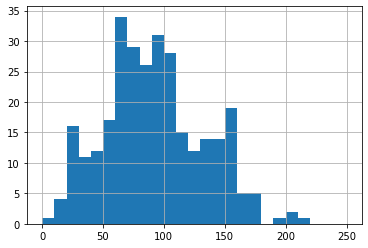

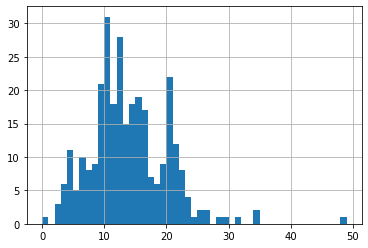

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


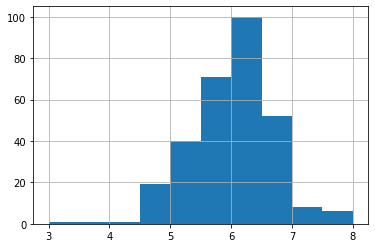

[('anies', 267), ('baswedan', 267), ('cawapres', 190), ('calon', 159), ('presiden', 154), ('wakil', 141), ('erick', 88), ('thohir', 74), ('survei', 70), ('ganjar', 63), ('politik', 58), ('indikator', 58), ('indonesia', 57), ('pasang', 54), ('hasil', 35), ('sandiaga', 34), ('nkri', 32), ('sumur', 32), ('resap', 32), ('elektabilitas', 32), ('jakarta', 30), ('uno', 30), ('pilih', 29), ('kadrun', 27), ('hama', 27), ('prabowo', 27), ('puan', 27), ('kuat', 27), ('pilpres', 25), ('simulasi', 25), ('dukung', 21), ('gaji', 21), ('salah', 20), ('pranowo', 19), ('banjir', 18), ('dasar', 17), ('gubernur', 17), ('iya', 16), ('et', 16), ('ridwan', 16), ('maharani', 15), ('peta', 15), ('sanding', 15), ('nama', 15), ('subianto', 14), ('kerja', 14), ('kamil', 13), ('capres', 12), ('ubah', 12), ('airlangga', 12), ('pengaruh', 12), ('sih', 11), ('publik', 11), ('persen', 11), ('unggul', 11), ('posisi', 11), ('jokowi', 10), ('loh', 10), ('bangun', 9), ('orang', 9), ('ppkm', 9), ('hartarto', 9), ('keren', 

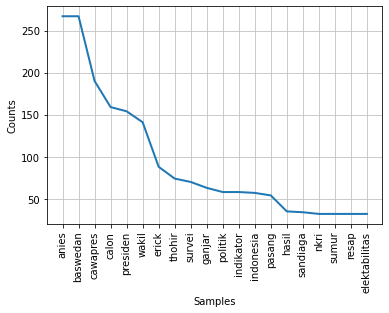

([('anies', 267),
  ('baswedan', 267),
  ('cawapres', 190),
  ('calon', 159),
  ('presiden', 154),
  ('wakil', 141),
  ('erick', 88),
  ('thohir', 74),
  ('survei', 70),
  ('ganjar', 63),
  ('politik', 58),
  ('indikator', 58),
  ('indonesia', 57),
  ('pasang', 54),
  ('hasil', 35),
  ('sandiaga', 34),
  ('nkri', 32),
  ('sumur', 32),
  ('resap', 32),
  ('elektabilitas', 32),
  ('jakarta', 30),
  ('uno', 30),
  ('pilih', 29),
  ('kadrun', 27),
  ('hama', 27),
  ('prabowo', 27),
  ('puan', 27),
  ('kuat', 27),
  ('pilpres', 25),
  ('simulasi', 25),
  ('dukung', 21),
  ('gaji', 21),
  ('salah', 20),
  ('pranowo', 19),
  ('banjir', 18),
  ('dasar', 17),
  ('gubernur', 17),
  ('iya', 16),
  ('et', 16),
  ('ridwan', 16),
  ('maharani', 15),
  ('peta', 15),
  ('sanding', 15),
  ('nama', 15),
  ('subianto', 14),
  ('kerja', 14),
  ('kamil', 13),
  ('capres', 12),
  ('ubah', 12),
  ('airlangga', 12),
  ('pengaruh', 12),
  ('sih', 11),
  ('publik', 11),
  ('persen', 11),
  ('unggul', 11),
  ('p

In [303]:
char_freq_distribution(df_raw)
word_len_freq_distribution(df_raw)
mean_words_freq_distribution(df_raw)
words_freq_distribution(df_raw)

In [304]:
for index in range(len(df_raw)):
    df_raw.iloc[index,1] = proses(df_raw.iloc[index,0])
    df_raw.iloc[index,1] = slang_cleaner(df_raw.iloc[index,1])
    df_raw.iloc[index,1] = proses(df_raw.iloc[index,1])

In [305]:
df_raw['clean_tweet'] = df_raw['clean_tweet'].apply(lambda x: word_tokenize(str(x)))
tweets = [word for tweet in df_raw['clean_tweet'] for word in tweet]
result = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:20]
print(result)

(anies, baswedan)       267
(calon, wakil)          140
(wakil, presiden)       140
(cawapres, calon)        82
(erick, thohir)          72
(indikator, politik)     49
(politik, indonesia)     47
(survei, indikator)      47
(presiden, cawapres)     46
(baswedan, anies)        45
(sumur, resap)           32
(hama, nkri)             27
(kadrun, hama)           27
(sandiaga, uno)          26
(hasil, survei)          23
(pasang, anies)          20
(ganjar, erick)          20
(ganjar, pranowo)        19
(baswedan, sandiaga)     18
(pasang, ganjar)         16
dtype: int64


# SENTIMENT ANALYSIS

In [306]:
#Lakukan Sentiment Analysis 
#masukkan hasilnya pada dataframe dengan nama kolom "sentiment"

In [307]:
for index in range(len(df_raw)):
    df_raw.iloc[index,1] = proses(df_raw.iloc[index,0])
    df_raw.iloc[index,1] = slang_cleaner(df_raw.iloc[index,1])
    df_raw.iloc[index,1] = proses(df_raw.iloc[index,1])

In [308]:
df_raw

,tweet,clean_tweet
0,@AOSBADUYtm007 @aniesbaswedan Sy salah satu da...,sy salah dukung anies baswedan nkri maju jaya ...
1,@fadhlierlanda @kurawa Kalau saya setuju aja k...,tuju kaji ulang kaji ulang dst anies baswedan ...
2,@adipribadiadang @FerdinandHaean3 Dia itu berh...,harap ajak anies baswedan utk bantu harap komi...
3,"Cerita Soal Kampung Akuarium Digusur Ahok, Ani...",cerita kampung akuarium gusur ahok anies baswe...
4,"Kampung Akuraium Digusur di Era Ahok, Anies: R...",kampung akuraium gusur era ahok anies baswedan...
...,...,...
295,@CNNIndonesia Banjir hanya ditujukan buat Anie...,banjir anies baswedan anies baswedan kaki bila...
296,Dan hasilnya adalah..... Anies dan keluarga se...,hasil anies baswedan keluarga kaya warga jakar...
297,@JacobibnUmar @TofaTofa_id @aniesbaswedan @KPK...,indonesia kadrun hama nkri kpk bukti anies bas...
298,@daRa__zi Cc buat Anies 😂😂,zi cc anies baswedan


In [309]:
#kita baca dataset kita
pos_list= open("./kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("./kata_negatif.txt","r")
neg_kata = neg_list.readlines()

In [310]:
df_raw.clean_tweet

0      sy salah dukung anies baswedan nkri maju jaya ...
1      tuju kaji ulang kaji ulang dst anies baswedan ...
2      harap ajak anies baswedan utk bantu harap komi...
3      cerita kampung akuarium gusur ahok anies baswe...
4      kampung akuraium gusur era ahok anies baswedan...
                             ...                        
295    banjir anies baswedan anies baswedan kaki bila...
296    hasil anies baswedan keluarga kaya warga jakar...
297    indonesia kadrun hama nkri kpk bukti anies bas...
298                                 zi cc anies baswedan
299           tanggung anies baswedan gubernur indonesia
Name: clean_tweet, Length: 300, dtype: object

In [311]:
hasil = []
list_negasi = ['tidak','lawan','anti', 'belum', 'belom', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'sulit', 'tak', 'sblm']

tweets = df_raw.clean_tweet.values.tolist()

for tweet in tweets:
    tweet_clean = tweet.strip().split()
    
    count_p = 0 #nilai positif
    count_n = 0 #nilai negatif

    #aku makan nasi
    #makan
    #tweets.index(tweet) --> makan index nomor berapa? -->1
    #tweets[0] --> aku

    for word in tweet_clean:
        for kata_pos in pos_kata:
            if kata_pos.strip().lower() == word.lower():
                if tweets[tweets.index(tweet)-1] in list_negasi:
                    print(tweets[tweets.index(tweet)-1], kata_pos, ['negatif'])
                    count_n += 1
                else:
                    print(kata_pos, ['positif'])
                    count_p += 1
        for kata_neg in neg_kata:
            if kata_neg.strip().lower() == word.lower():
                if tweets[tweets.index(tweet)-1] in list_negasi:
                    print(tweets[tweets.index(tweet)-1], kata_neg, ['positif'])
                    count_p += 1
                else:
                    print(kata_neg, ['negatif'])
                    count_n += 1
    
    print ("positif: "+str(count_p))
    print ("negatif: "+str(count_n))
    hasil.append(count_p - count_n)
    print ("-----------------------------------------------------")
    

salah
 ['negatif']
maju
 ['positif']
positif: 1
negatif: 1
-----------------------------------------------------
kaji
 ['positif']
kaji
 ['positif']
banjir
 ['negatif']
positif: 2
negatif: 1
-----------------------------------------------------
bantu
 ['positif']
positif: 1
negatif: 0
-----------------------------------------------------
gelap
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gelap
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
pakar
 ['positif']
positif: 1
negatif: 0
-----------------------------------------------------
pakar
 ['positif']
positif: 1
negatif: 0
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
cerdas
 ['positif']
hama
 ['negatif']
dampak
 ['negatif']
positif: 1
negatif: 2
-----------------------------------------------------
pakar
 ['positif']
positif: 1
negatif: 0
-----------------------------

In [312]:
sentiments = ["positif" if sentimen >= 0 else "negatif" for sentimen in hasil]
df_raw["sentiment"] = sentiments

In [313]:
df_raw

,tweet,clean_tweet,sentiment
0,@AOSBADUYtm007 @aniesbaswedan Sy salah satu da...,sy salah dukung anies baswedan nkri maju jaya ...,positif
1,@fadhlierlanda @kurawa Kalau saya setuju aja k...,tuju kaji ulang kaji ulang dst anies baswedan ...,positif
2,@adipribadiadang @FerdinandHaean3 Dia itu berh...,harap ajak anies baswedan utk bantu harap komi...,positif
3,"Cerita Soal Kampung Akuarium Digusur Ahok, Ani...",cerita kampung akuarium gusur ahok anies baswe...,negatif
4,"Kampung Akuraium Digusur di Era Ahok, Anies: R...",kampung akuraium gusur era ahok anies baswedan...,negatif
...,...,...,...
295,@CNNIndonesia Banjir hanya ditujukan buat Anie...,banjir anies baswedan anies baswedan kaki bila...,negatif
296,Dan hasilnya adalah..... Anies dan keluarga se...,hasil anies baswedan keluarga kaya warga jakar...,positif
297,@JacobibnUmar @TofaTofa_id @aniesbaswedan @KPK...,indonesia kadrun hama nkri kpk bukti anies bas...,negatif
298,@daRa__zi Cc buat Anies 😂😂,zi cc anies baswedan,positif


Nilai rata-rata: 0.05
Standar deviasi: 1.5212385304963407


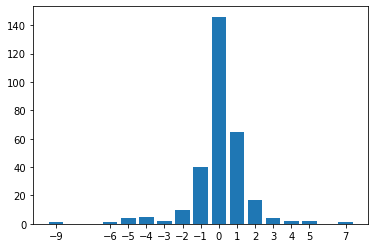

In [314]:
print ("Nilai rata-rata: "+str(np.mean(hasil)))
print ("Standar deviasi: "+str(np.std(hasil)))

labels, counts = np.unique(hasil, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

#lakukan analisis dan tarik kesimpulan dari Text analysis dan Sentiment Analysis

#masukkan analisis kalian pada sel berikut.

Pada text analysis di atas dapat dilihat bahwa jumlah karakter per tweet terbanyak di sekitar 60-110 karakter. Panjang kata sebesar 10 hingga 15 karakter dan banyak kata per tweet sekitar 5 sampai 7 per tweet.
Kata yang paling banyak muncul adalah anies karena query wordnya adalah anies, lalu baswedan, cawapres, calon, presiden, wakil, dsb. Dari sini kita dapat menyimpulkan bahwa anies banyak dibicarakan untuk menjadi calon presiden/wakil presiden pada pilpres 2024 nanti.
Pada Analisis bi-gram, dapat dilihat bahwa anies baswedan menjadi perbincangan untuk menjadi calon wakil presiden dengan erick tohir hasil dari lembaga survey indikator politik

Pada sentiment analysis di atas, dapat dilihat bahwa dari 300 tweet yang diambil rata-rata sentimen tweet sebesar 0.05 dan standar deviasi 1.52. Hal ini menandakan sentimen tweet terhadap anies netral dan lebih positif sedikit.